In [2]:
try:
    from databook_utils.dandi_utils import dandi_download_open
except:
    !git clone https://github.com/AllenInstitute/openscope_databook.git
    %cd openscope_databook    
    %pip install -e .

^C
e:\2025\25-2랩\LFP\openscope_databook\openscope_databook
Obtaining file:///E:/2025/25-2%EB%9E%A9/LFP/openscope_databook/openscope_databook
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: file:///E:/2025/25-2%EB%9E%A9/LFP/openscope_databook/openscope_databook does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


Cloning into 'openscope_databook'...
Updating files:  84% (93/110)
Updating files:  85% (94/110)
Updating files:  86% (95/110)
Updating files:  87% (96/110)
Updating files:  88% (97/110)
Updating files:  89% (98/110)
Updating files:  90% (99/110)
Updating files:  91% (101/110)
Updating files:  92% (102/110)
Updating files:  93% (103/110)
Updating files:  94% (104/110)
Updating files:  95% (105/110)
Updating files:  96% (106/110)
Updating files:  97% (107/110)
Updating files:  98% (108/110)
Updating files:  99% (109/110)
Updating files: 100% (110/110)
Updating files: 100% (110/110), done.


# Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
!{sys.executable} -m pip install matplotlib numpy scipy pynwb quantities elephant neo
print(sys.executable)
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pynwb import NWBHDF5IO
from math import sqrt
from scipy import interpolate



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


e:\2025\25-2랩\LFP\.venv312\Scripts\python.exe


In [23]:
import quantities as pq
from elephant.current_source_density import estimate_csd
from neo import AnalogSignal
import math

# Environment settings

In [4]:
stim_path = r"E:\2025\25-2랩\Coding project\sub-619296_ses-1187930705_ogen.nwb"
stim_io = NWBHDF5IO(stim_path, 'r')
stim_nwb = stim_io.read()

lfp_path = r"E:\2025\25-2랩\Coding project\sub-619296_ses-1187930705_probe-2_ecephys.nwb"
lfp_io = NWBHDF5IO(lfp_path, 'r')
lfp_nwb = lfp_io.read()


# Get LFP datas

In [54]:
# lfp : probe 2 lfp data // show probes in this file
print(lfp_nwb.acquisition.keys())
lfp = lfp_nwb.acquisition["probe_2_lfp_data"]
print(lfp)
print("---")
print(lfp.electrodes.table)

electrodes_df = lfp.electrodes.table.to_dataframe()
y_coordinates = electrodes_df['y']
y_array = y_coordinates.values
print(y_array)

ids = electrodes_df['local_index'].values
print(ids)
print(len(ids))



dict_keys(['probe_2_lfp', 'probe_2_lfp_data'])
probe_2_lfp_data pynwb.ecephys.ElectricalSeries at 0x1232961562688
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (11204356, 84), type "<f4">
  description: no description
  electrodes: electrodes <class 'hdmf.common.table.DynamicTableRegion'>
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (11204356,), type "<f8">
  timestamps_unit: seconds
  unit: volts

---
electrodes pynwb.ecephys.ElectrodesTable at 0x1232988735920
Fields:
  colnames: ['location' 'group' 'group_name' 'probe_vertical_position'
 'probe_horizontal_position' 'probe_id' 'local_index' 'valid_data' 'x' 'y'
 'z' 'imp' 'filtering']
  columns: (
    location <class 'hdmf.common.table.VectorData'>,
    group <class 'hdmf.common.table.VectorData'>,
    group_name <class 'hdmf.common.table.VectorData'>,
    probe_vertical_position <class 'hdmf.common.table.VectorData'>,
    probe_horizontal_positi

In [6]:
print(lfp_nwb.electrodes["id"][:])
print(lfp_nwb.electrodes["location"][:])
lfp_id = lfp_nwb.electrodes["id"][:]
lfp_loca = lfp_nwb.electrodes["location"][:]

id_V11 = np.where(lfp_loca == 'VISp1')
id_V123 = np.where(lfp_loca == 'VISp2/3')
id_V14 = np.where(lfp_loca == 'VISp4')
id_V15 = np.where(lfp_loca == 'VISp5')
id_V16a = np.where(lfp_loca == 'VISp6a')
id_V16b = np.where(lfp_loca == "VISp6b")
print(id_V16b)
print(lfp_id[id_V16b])

[2002 2006 2010 2014 2018 2022 2026 2030 2034 2038 2042 2046 2050 2054
 2058 2062 2066 2070 2074 2078 2082 2086 2090 2094 2098 2102 2106 2110
 2114 2118 2122 2126 2130 2134 2138 2142 2146 2150 2154 2158 2162 2166
 2170 2174 2178 2182 2186 2190 2194 2198 2202 2206 2210 2214 2218 2222
 2226 2230 2234 2238 2242 2246 2250 2254 2258 2262 2266 2270 2274 2278
 2282 2286 2290 2294 2298 2302 2306 2310 2314 2318 2322 2326 2330 2334]
['SCig' 'SCig' 'SCig' 'SCig' 'SCig' 'SCig' 'SCig' 'SCig' 'SCig' 'SCig'
 'SCig' 'SCig' 'SCig' 'SCig' 'SCig' 'SCig' 'SCig' 'SCig' 'SCig' 'POST'
 'POST' 'POST' 'POST' 'POST' 'POST' 'POST' 'POST' 'POST' 'POST' 'POST'
 'POST' 'POST' 'POST' 'HPF' 'HPF' 'HPF' 'HPF' 'HPF' 'HPF' 'HPF' 'HPF'
 'HPF' 'HPF' 'HPF' 'HPF' 'HPF' 'HPF' 'VISp6b' 'VISp6a' 'VISp6a' 'VISp6a'
 'VISp6a' 'VISp6a' 'VISp5' 'VISp5' 'VISp5' 'VISp5' 'VISp5' 'VISp5' 'VISp5'
 'VISp4' 'VISp4' 'VISp4' 'VISp4' 'VISp2/3' 'VISp2/3' 'VISp2/3' 'VISp2/3'
 'VISp2/3' 'VISp2/3' 'VISp2/3' 'VISp2/3' 'VISp1' 'VISp1' 'VISp1' 'roo

# Get Stimulation times

In [72]:
stim_key = "ICkcfg1"
key = f"{stim_key}_presentations"
id = 8

In [46]:
stim_table = stim_nwb.intervals[key]
print(stim_table.colnames)
control_stim_select = lambda row: row.frame.item() == 0.0
control_stim_times = [float(stim_table[i].start_time) for i in range(len(stim_table)) if control_stim_select(stim_table[i])]
print(f"control trials : {len(control_stim_times)}")

('start_time', 'stop_time', 'stimulus_name', 'stimulus_block', 'frame', 'stimulus_index', 'tags', 'timeseries')
control trials : 750


In [44]:
def stim_times(illusion_index):
    stim_select = lambda row: row.frame.item() == illusion_index
    # for rows that satisfy condition above, extracts the start time and adds it to 'all_stim_times' list
    all_stim_times = [float(stim_table[i].start_time) for i in range(len(stim_table)) if stim_select(stim_table[i])]

    return all_stim_times

In [47]:
def extract_lfp(illusion_index):
    illusion_index = 3.0
    stim_select = lambda row: row.frame.item() == illusion_index
    # for rows that satisfy condition above, extracts the start time and adds it to 'all_stim_times' list
    all_stim_times = [float(stim_table[i].start_time) for i in range(len(stim_table)) if stim_select(stim_table[i])]
    print(f"illusion trials : {len(all_stim_times)}")
    period_start =(math.floor(all_stim_times[0]/100)-2) * 100
    period_end = (math.floor(all_stim_times[-1]/100)+1)*100

    stim_times = np.array([ts for ts in all_stim_times if ts >= period_start and ts <= period_end])
    if len(stim_times) == 0:
        raise ValueError("There are no stimulus timestamps in that period")

    # find indices within lfp data that correspond to period bounds
    period_start_idx, period_end_idx = np.searchsorted(lfp.timestamps, (period_start, period_end))

    # get slice of LFP data corresponding to the period bounds
    # 5000s ~ 5800s의 lfp data 추출
    lfp_timestamps = lfp.timestamps[period_start_idx:period_end_idx]    # lfp_timestamps : x축 (5000~5800 중 기록한 time)
    lfp_data = lfp.data[period_start_idx:period_end_idx]                # lfp_data : y축 (#electrodes, potential값 (V))
    return lfp_timestamps, lfp_data

In [48]:
def extract_lfp_period(illusion_index, period_start, period_end):
    illusion_index = 3.0
    stim_select = lambda row: row.frame.item() == illusion_index
    # for rows that satisfy condition above, extracts the start time and adds it to 'all_stim_times' list
    all_stim_times = [float(stim_table[i].start_time) for i in range(len(stim_table)) if stim_select(stim_table[i])]
    print(f"illusion trials : {len(all_stim_times)}")

    stim_times = np.array([ts for ts in all_stim_times if ts >= period_start and ts <= period_end])
    if len(stim_times) == 0:
        raise ValueError("There are no stimulus timestamps in that period")

    # find indices within lfp data that correspond to period bounds
    period_start_idx, period_end_idx = np.searchsorted(lfp.timestamps, (period_start, period_end))

    # get slice of LFP data corresponding to the period bounds
    # 5000s ~ 5800s의 lfp data 추출
    lfp_timestamps = lfp.timestamps[period_start_idx:period_end_idx]    # lfp_timestamps : x축 (5000~5800 중 기록한 time)
    lfp_data = lfp.data[period_start_idx:period_end_idx]                # lfp_data : y축 (#electrodes, potential값 (V))
    return lfp_timestamps, lfp_data

In [43]:
print("First timestamp stimulus data: ", stim_times(3)[0])
print("Last timestamp stimulus data: ", stim_times(3)[-1])
print("First timestamp LFP data: ", lfp.timestamps[0])
print("Last timestamp LFP data: ", lfp.timestamps[-1])

illusion trials : 30
First timestamp stimulus data:  5266.66248
illusion trials : 30
Last timestamp stimulus data:  5735.85698
First timestamp LFP data:  4.602373472145722
Last timestamp LFP data:  8968.041171502357


# Choose time window

In [9]:
# period_start = lfp.timestamps[0]
period_start = 5000
# period_end = lfp.timestamps[-1]
period_end = 5800

In [37]:
'''
# filter stim_timestamps to just timestamps within period
stim_times = np.array([ts for ts in all_stim_times if ts >= period_start and ts <= period_end])
if len(stim_times) == 0:
    raise ValueError("There are no stimulus timestamps in that period")

# find indices within lfp data that correspond to period bounds
period_start_idx, period_end_idx = np.searchsorted(lfp.timestamps, (period_start, period_end))

# get slice of LFP data corresponding to the period bounds
# 5000s ~ 5800s의 lfp data 추출
lfp_timestamps = lfp.timestamps[period_start_idx:period_end_idx]    # lfp_timestamps : x축 (5000~5800 중 기록한 time)
lfp_data = lfp.data[period_start_idx:period_end_idx]                # lfp_data : y축 (#electrodes, potential값 (V))
'''

'\n# filter stim_timestamps to just timestamps within period\nstim_times = np.array([ts for ts in all_stim_times if ts >= period_start and ts <= period_end])\nif len(stim_times) == 0:\n    raise ValueError("There are no stimulus timestamps in that period")\n\n# find indices within lfp data that correspond to period bounds\nperiod_start_idx, period_end_idx = np.searchsorted(lfp.timestamps, (period_start, period_end))\n\n# get slice of LFP data corresponding to the period bounds\n# 5000s ~ 5800s의 lfp data 추출\nlfp_timestamps = lfp.timestamps[period_start_idx:period_end_idx]    # lfp_timestamps : x축 (5000~5800 중 기록한 time)\nlfp_data = lfp.data[period_start_idx:period_end_idx]                # lfp_data : y축 (#electrodes, potential값 (V))\n'

In [63]:
lfp_timestamps, lfp_data = extract_lfp(id)
print(lfp_data.shape)

illusion trials : 30
(1000005, 84)


# LFP Interpolation / Sampling

In [52]:
def sampling_lfp(data, timestamps, sampling_hz):
    time_axis = np.arange(timestamps[0], timestamps[-1], step=(1/sampling_hz)) # interpolated time axis(200000, 0.004s 단위)
    sample_channels = []

    # interpolate channel by channel to save RAM
    for channel in range(lfp_data.shape[1]):
        f = interpolate.interp1d(lfp_timestamps, lfp_data[:,channel], axis=0, kind="nearest", fill_value="extrapolate")
        sample_channels.append(f(time_axis))

    sample_lfp = np.transpose(sample_channels) # interpolated lfps (200000 * 84 electrodes)
    tp_lfp = np.array(sample_channels)

    print(sample_lfp.shape) # -> time window : 800s -> 800s * 250 Hz = 200000 (interpolated) (fq, electrode)
    print(tp_lfp.shape) # (electrode, fq)
    print(time_axis.shape) # (fq, )
    return sample_lfp, tp_lfp, time_axis

In [53]:
interp_lfp, tp_lfp, time_axis = sampling_lfp(lfp_data, lfp_timestamps, 1000)

(800000, 84)
(84, 800000)
(800000,)


# 2024 paper, LFP noise elimination

In [59]:
def preparation(data):
    prep_lfp = data - np.mean(data, axis=1, keepdims=True)
    tp_data = np.transpose(data)
    prep_tp_lfp = tp_data - np.mean(tp_data, axis=0, keepdims=True)
    return prep_lfp, prep_tp_lfp

In [61]:
prep_lfp, prep_tp_lfp = preparation(interp_lfp)
print(prep_tp_lfp.shape)
print(prep_lfp.shape)

(84, 800000)
(800000, 84)


In [15]:
def plot_hist(x, y, title="LFP"):
    plt.figure(figsize = (6, 4))
    plt.plot(x, y, color='black', linewidth = 1)
    plt.xlabel("Time (s)")
    plt.ylabel("LFP (V)")
    plt.title(title)
    #plt.axvline(0, color = 'r', linestyle = '--', label = 'stimulus onset')
    plt.legend()
    plt.show()

C:\Users\Jacxxy\AppData\Local\Temp\ipykernel_24016\2496117853.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


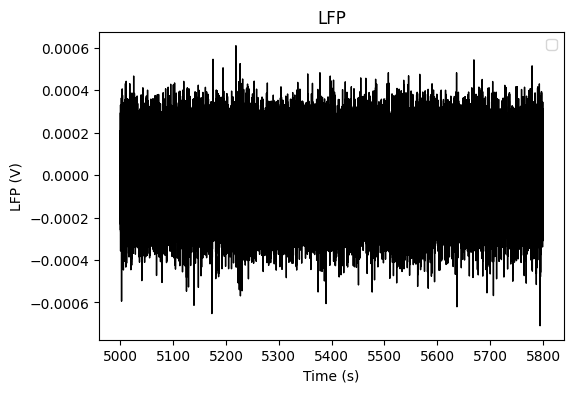

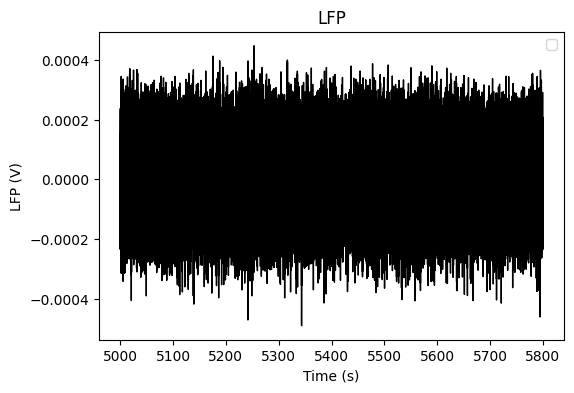

In [16]:
plot_hist(time_axis, tp_lfp[0])
plot_hist(time_axis, prep_tp_lfp[0])

# Stim time windows

In [17]:
window_start_time = -0.2
window_end_time = 0.6
twin = [window_start_time, window_end_time]

In [18]:
def get_windows(lfp):
        # validate window bounds
    if window_start_time > 0:
        raise ValueError("start time must be non-positive number")
    if window_end_time <= 0:
        raise ValueError("end time must be positive number")
        
    # get event windows
    windows = []
    window_length = int((window_end_time-window_start_time) * interp_hz)

    for stim_ts in stim_times:
        # convert time to index
        start_idx = int( (stim_ts + window_start_time - lfp_timestamps[0]) * interp_hz )
        end_idx = start_idx + window_length
    
        # bounds checking
        if start_idx < 0 or end_idx > len(interp_lfp):
            continue
            
        windows.append(lfp[start_idx:end_idx])
        
    if len(windows) == 0:
        raise ValueError("There are no windows for these timestamps")

    windows = np.array(windows)
    print(windows.shape)
    return windows

In [19]:
prep_windows = get_windows(prep_lfp)
windows = get_windows(interp_lfp)

(30, 800, 84)
(30, 800, 84)


# Visualizing LFP Traces

In [20]:
def visualize_LFP_trace(window, start_ch, end_ch, title = "LFP Trace Over Time"):
    average_trace = np.average(window, axis=0)
    print(average_trace.shape)

    # get standard error of the mean for confidence interval

    n = window.shape[0]
    ci = np.std(window, axis=0) / sqrt(n)
    print(ci.shape)
    print(average_trace.shape[1])

    n_ch = end_ch - start_ch
    %matplotlib inline

    xaxis = np.linspace(window_start_time, window_end_time, len(average_trace))
    fig, ax = plt.subplots(figsize=(12,8))
    #colors = plt.cm.viridis(np.linspace(0, 1, n_ch))
    #ax.set_prop_cycle(color=colors)
    ax.axvline(0, color="red", ls=":")
    lines = ax.plot(xaxis, average_trace[:,start_ch:end_ch])
    
    # VISp 한번에 도시 : layer별로 색 다르게(한번에 도시한 경우만 사용)
    rules_rel = [(72, 74, "red"), (64, 71, "yellow"), (60, 63, "green"), (53, 59, "blue"), (48, 52, "purple")]

    for s, e, color in rules_rel:
        for i in range(max(0, s), min(n_ch - 1, e) + 1):
            lines[i].set_color(color)

    plt.xlabel("Time relative to stimulus onset (s)")
    plt.ylabel("LFP (volts)")
    plt.title(title)
    plt.show()

(800, 84)
(800, 84)
84


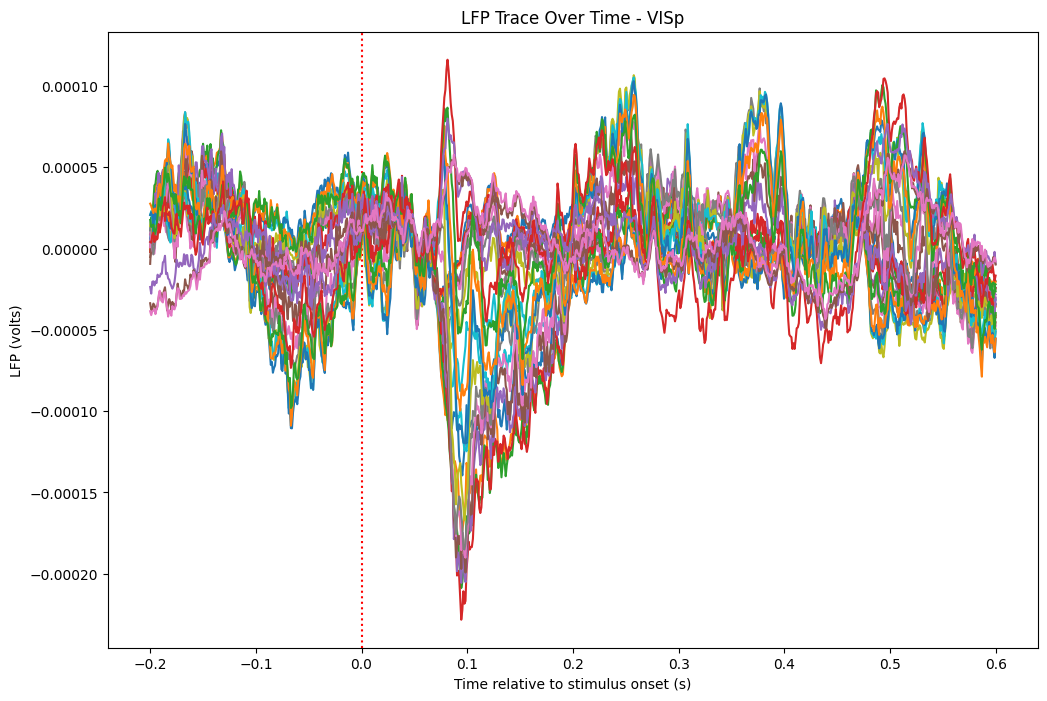

'\nvisualize_LFP_trace(prep_windows, 72, 74, "LFP Trace Over Time - VISp1") # VISp1\nvisualize_LFP_trace(prep_windows, 64, 71, "LFP Trace Over Time - VISp2/3") # VISp2/3\nvisualize_LFP_trace(prep_windows, 60, 63, "LFP Trace Over Time - VISp4") # VISp4\nvisualize_LFP_trace(prep_windows, 53, 59, "LFP Trace Over Time - VISp5") # VISp5\nvisualize_LFP_trace(prep_windows, 48, 52, "LFP Trace Over Time - VISp6a") # VISp6a\nvisualize_LFP_trace(prep_windows, 47, 47, "LFP Trace Over Time - VISp6b") # VISp6b\n\n'

In [21]:
# visualize_LFP_trace(prep_windows, 0, 84)
visualize_LFP_trace(prep_windows, 47, 74, "LFP Trace Over Time - VISp") #VISp
'''
visualize_LFP_trace(prep_windows, 72, 74, "LFP Trace Over Time - VISp1") # VISp1
visualize_LFP_trace(prep_windows, 64, 71, "LFP Trace Over Time - VISp2/3") # VISp2/3
visualize_LFP_trace(prep_windows, 60, 63, "LFP Trace Over Time - VISp4") # VISp4
visualize_LFP_trace(prep_windows, 53, 59, "LFP Trace Over Time - VISp5") # VISp5
visualize_LFP_trace(prep_windows, 48, 52, "LFP Trace Over Time - VISp6a") # VISp6a
visualize_LFP_trace(prep_windows, 47, 47, "LFP Trace Over Time - VISp6b") # VISp6b

'''

(800, 84)
(800, 84)
84


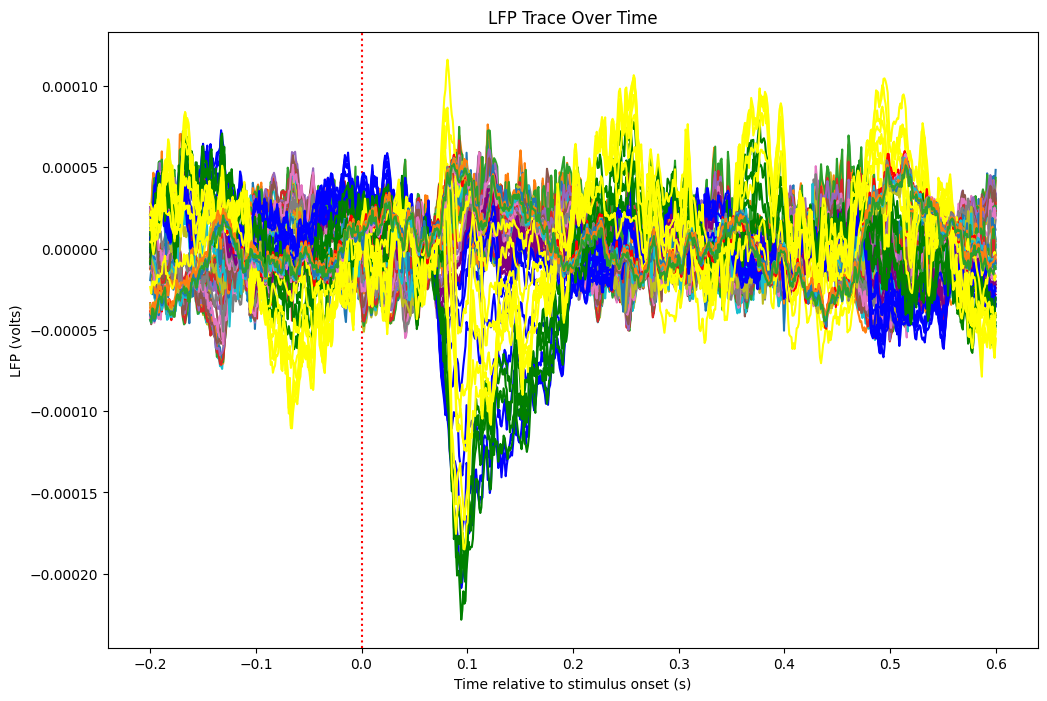

In [ ]:
lfp, 
visualize_LFP_trace(prep_windows, 0, 83)

# Trace over depth

In [65]:
amp_res = 0.00002
%matplotlib inline

xaxis = np.linspace(window_start_time, window_end_time, len(average_trace))
colors = plt.cm.viridis(np.linspace(0, 1, n_channels))
fig, ax = plt.subplots(figsize=(8, n_channels/2))

for i, channel in enumerate(range(start_channel, end_channel)):
    offset_trace = average_trace[:,channel] + i*amp_res
    plot = ax.plot(xaxis, offset_trace, color=colors[i])

ax.axvline(0, color="red", ls=":")
norm = mpl.colors.Normalize(vmin=start_channel, vmax=end_channel)
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm), location="left", anchor=(0,1), shrink=0.2, ax=ax, label='Depth (channel #)')
ax.yaxis.set_ticks([])
plt.xlabel("time (s)")
plt.ylabel("LFP")
plt.title("LFP Traces Shown By Depth")
plt.show()

NameError: name 'average_trace' is not defined

# Current source density analysis / Individual trial

In [66]:
def display_response_window(window, start_time, end_time, vmin=None, vmax=None, title="", xlabel="", ylabel="", cbar_label=""):
    fig, ax = plt.subplots(figsize=(6,6))
    elect_y = y_array # [electrode의 y위치 : depth]
    img = ax.imshow(window, 
                    extent=[start_time, end_time, elect_y[0], elect_y[-1]],  
                    aspect="auto",
                    vmin=vmin,
                    vmax=vmax
                ) # set vmin and vmax here as needed

    # make dotted line at stimulus onset
    ax.plot([0,0],[elect_y[0], elect_y[-1]], ':', color='white', linewidth=1.0)

    cbar = fig.colorbar(img, shrink=0.5)
    cbar.set_label(cbar_label)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

0.000536445
-0.000671385
(84, 800)


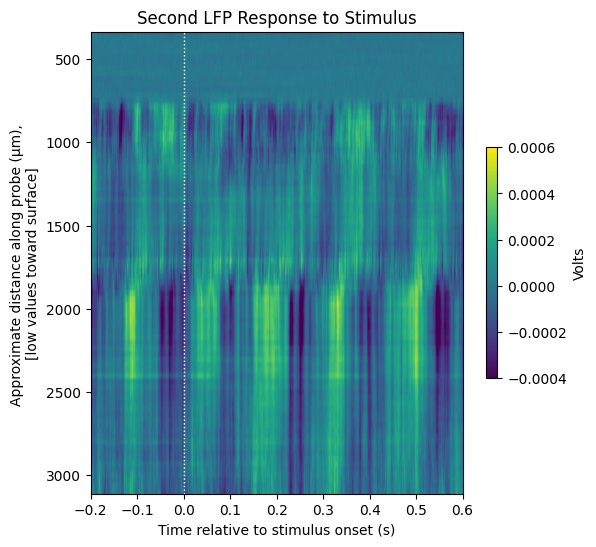

In [67]:
windows_for_CS = np.transpose(windows, axes=(0,2,1))#[trial][electrode][time_index]
w0 = windows_for_CS[1][::-1]
print(np.max(w0))
print(np.min(w0))
print(w0.shape)
display_response_window(w0,
                        window_start_time,
                        window_end_time, vmin=-0.0004, vmax=0.0006,
                        title="Second LFP Response to Stimulus",
                        xlabel="Time relative to stimulus onset (s)",
                        ylabel="Approximate distance along probe (μm), \n[low values toward surface]",
                        cbar_label="Volts")

# Average for all trial

In [68]:
# get average of all windows
# [trial][electrode][time_index] -> [electrode][time_index]
average_trace = np.average(windows_for_CS, axis=0) 
print(average_trace.shape)
print(np.max(average_trace))
print(np.min(average_trace))

(84, 800)
0.000120438504
-0.00027575603


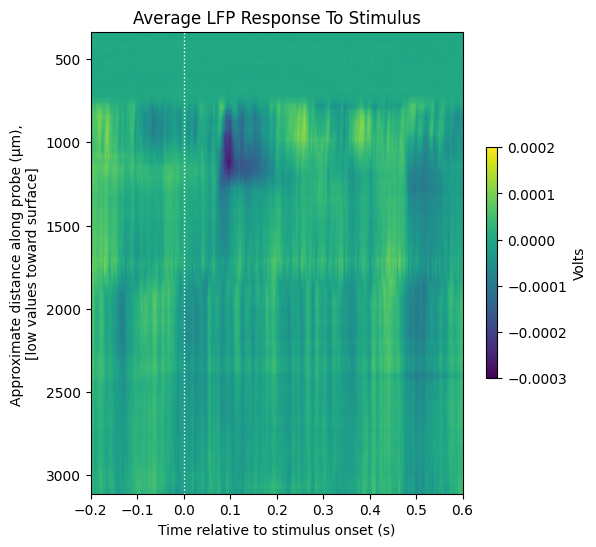

In [69]:
display_response_window(average_trace[::-1],
                        window_start_time,
                        window_end_time, vmin = -0.0003, vmax = 0.0002,
                        title="Average LFP Response To Stimulus",
                        xlabel="Time relative to stimulus onset (s)",
                        ylabel="Approximate distance along probe (μm), \n[low values toward surface]",
                        cbar_label="Volts")

In [ ]:
coords = [(elem,) for elem in range(average_trace.shape[0])]
neo_lfp = AnalogSignal(average_trace.transpose(), units="V", sampling_rate = interp_hz*pq.Hz)
neo_lfp.annotate(coordinates = coords * pq.mm)

In [ ]:
# this takes a while
csd = np.array(estimate_csd(neo_lfp, method="KCSD1D"))
csd.shape

No lambda given, using defaults
Cross validating R (all lambda) : 0.23


KeyboardInterrupt: 

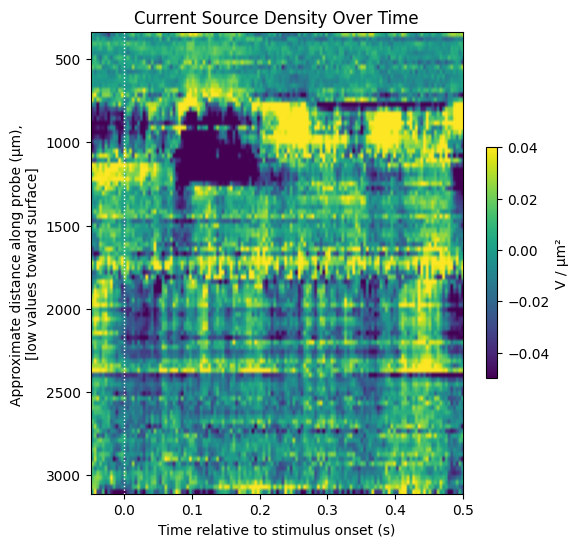

In [ ]:
display_response_window(csd.transpose()[::-1],
                        window_start_time,
                        window_end_time,
                        title="Current Source Density Over Time",
                        xlabel="Time relative to stimulus onset (s)",
                        ylabel="Approximate distance along probe (μm), \n[low values toward surface]",
                        cbar_label="V / μm²",
                        vmin=-0.05,
                        vmax=0.04)

prep_lfp : (electrode, timebin(200000))
windows : (trial, timebin(-0.05~0.5s), electrodes)

In [ ]:
prep_windows = get_windows(prep_lfp)
tp_windows = np.transpose(prep_windows, (2, 0, 1)) #electrode, trial, times
print(tp_windows.shape)
X = np.fft.fft(tp_windows, axis=2)
f = np.fft.fftfreq(tp_windows.shape[2], d = 1/interp_hz)
print(X.shape)
print(f.shape)
print(X[0][0][0])

(30, 800, 84)
(84, 30, 800)
(84, 30, 800)
(800,)
(-0.012682273199743577+0j)


# Get Unit spike times for region

In [ ]:
units = stim_nwb.units
channel_probes = {}

electrodes = stim_nwb.electrodes
for i in range(len(electrodes)):
    channel_id = electrodes["id"][i]
    location = electrodes["location"][i]
    channel_probes[channel_id] = location

def get_unit_location(row):
    return channel_probes[int(row.peak_channel_id)]

print(set(get_unit_location(row) for row in units))

{'VISp4', 'ENTm3', 'ENTm5', 'CA1', 'NOT', 'VISp5', 'VISrl4', 'VISal6b', 'POL', 'VISam6a', 'LP', 'DG-mo', 'VISal4', 'VISp2/3', 'VISpm5', 'VISal2/3', 'VISrl5', 'VISpm4', 'VISal5', 'VISpm6b', 'VISam2/3', 'HPF', 'ENTm2', 'PoT', 'VISp6b', 'VISpm6a', 'TH', 'DG-sg', 'VISrl6a', 'MGm', 'DG-po', 'VISpm2/3', 'root', 'PPT', 'APN', 'VISam4', 'MB', 'ENTm6', 'MGd', 'VISam5', 'PAR', 'CA3', 'VISrl6b', 'SGN', 'VISp6a', 'VISl1', 'VISp1', 'SUB', 'SCig', 'VISrl2/3', 'VISrl1', 'VISal6a'}


In [ ]:
def get_units(region):
    # select units based if they have 'good' quality and exists in one of the specified brain_regions
    units_spike_times = []
    units_ids = []
    location_units_spike_times = []
    for row in units:
        if get_unit_location(row) == region and row.quality.item() == "good":
            location_units_spike_times.append(row.spike_times.item())
            units_ids.append(row.cluster_id.item())
    units_spike_times += location_units_spike_times
    print(len(units_spike_times))
    return units_spike_times, units_ids

In [ ]:
_, b = get_units(area)

In [ ]:
from scipy.signal import fftconvolve, get_window

def _ppc_from_angles(phi):
    N = len(phi)
    if N < 2: return np.nan
    z = np.exp(1j * phi)
    S = np.sum(z)
    return (np.abs(S)**2 - N) / (N*(N-1))

def _complex_sinusoid_kernel(fs, f0, n_cycles=6, window='hann'):
    L = int(np.round(n_cycles * fs / f0))
    L = max(L, int(fs / f0))
    if L % 2 == 0: L += 1
    t = np.arange(-L//2, L//2 + 1) / fs
    win = get_window(window, L+1, fftbins=False)
    kernel = win * np.exp(2j*np.pi*f0*t)
    kernel = kernel / np.sqrt(np.sum(np.abs(kernel)**2))
    return kernel

def su_lfp_ppc_mouse(lfp, spikes_s, fs, f_gamma, n_cycles=6, t_window=None, min_spikes=5):
    # lfp: (T,W) 또는 (W,)
    lfp = np.asarray(lfp)
    if lfp.ndim == 1: lfp = lfp[None,:]
    T, W = lfp.shape
    
    ker = _complex_sinusoid_kernel(fs, f_gamma, n_cycles=n_cycles, window='hann')
    z_all = np.stack([fftconvolve(tr, ker, mode='same') for tr in lfp], axis=0)  # (T,W) complex

    if t_window is None:
        s0, s1 = 0, W
    else:
        t0, t1 = t_window
        s0 = max(0, int(np.floor(t0 * fs)))
        s1 = min(W, int(np.ceil(t1 * fs)))

    trial_ppc = np.full(T, np.nan)
    pooled = []
    for t in range(T):
        s = spikes_s[t]
        if s is None or len(s) == 0: 
            continue
        idx = np.clip((s * fs).astype(int), 0, W-1)
        mask = (idx >= s0) & (idx < s1)
        idx = idx[mask]
        if len(idx) < min_spikes: 
            continue
        phi = np.angle(z_all[t, idx])
        trial_ppc[t] = _ppc_from_angles(phi)
        pooled.append(phi)
    if len(pooled) >= 1 and sum(map(len, pooled)) >= 2:
        pooled_ppc = _ppc_from_angles(np.concatenate(pooled))
    else:
        pooled_ppc = np.nan
    return {"trial_ppc": trial_ppc, "pooled_ppc": pooled_ppc}

def find_gamma_peak_frequency(lfp, spikes_s, fs, fmin=25, fmax=90, df=1, n_cycles=6, t_window=None, min_spikes=5):
    lfp = np.asarray(lfp)
    if lfp.ndim == 1: lfp = lfp[None,:]
    f_grid = np.arange(fmin, fmax+1e-9, df)
    spec = []
    for f0 in f_grid:
        out = su_lfp_ppc_mouse(lfp, spikes_s, fs, f0, n_cycles=n_cycles, t_window=t_window, min_spikes=min_spikes)
        spec.append(out["pooled_ppc"])
    spec = np.array(spec)
    f_peak = np.nan if np.all(np.isnan(spec)) else f_grid[np.nanargmax(spec)]
    return f_grid, spec, f_peak


In [ ]:
def ppc_spectrum_for_unit(lfp_rep, spikes_s, fs, fmin=25, fmax=90, df=1,
                          n_cycles=6, t_window=(0.1,0.4), min_spikes=5):
    """한 유닛의 SU–LFP PPC 스펙트럼과 그 피크 주파수 반환"""
    f_grid = np.arange(fmin, fmax+1e-9, df)
    spec = []
    for f0 in f_grid:
        out = su_lfp_ppc_mouse(lfp_rep, spikes_s, fs, f0,
                               n_cycles=n_cycles, t_window=t_window, min_spikes=min_spikes)
        spec.append(out["pooled_ppc"])
    spec = np.asarray(spec, float)
    if np.all(np.isnan(spec)):
        f_peak = np.nan
    else:
        f_peak = f_grid[np.nanargmax(spec)]
    return f_grid, spec, f_peak

In [ ]:
def PPC_LFP(lfp1, lfp2, epochs=0.5):
    #lfp : (trial, times)
    fs = interp_hz
    N = len(lfp1) # trials
    T = lfp1.shape[-1] # times, frequency
    # complex fourier transform
    X1 = np.fft.fft(lfp1, axis=-1) # (trial, frequency)
    f = np.fft.fftfreq(lfp1.shape[-1], d=1/fs)
    X2 = np.fft.fft(lfp2, axis=-1) # (trial, frequency)
    # Xs1, fs, Xs2 = np.fft.fftshift(X1, axes=-1), np.fft.fftshift(f), np.fft.fftshift(X2, axes=-1)

    # normalization
    mag1 = np.abs(X1)
    unit_X1 = np.divide(X1, mag1, out=np.zeros_like(X1), where=mag1 != 0)
    mag2 = np.abs(X2)
    unit_X2 = np.divide(X2, mag2, out=np.zeros_like(X2), where=mag2 != 0)
    con_X2 = np.conj(unit_X2)
    ppc_t = unit_X1 * con_X2 # (trial, normalized angle vector)
    sum_ppc = np.sum(unit_X1, axis=0) * np.sum(unit_X1, axis=0) - N
    PPC = sum_ppc / (N*(N-1))
    print(f"PPC shape : {PPC.shape}")

    return PPC, f


In [ ]:
def make_rep_lfp_from_visp4(lfp_in):

    lfp = np.moveaxis(lfp_in, 0, 1)          
    lfp_bp = lfp[:, :-1, :] - lfp[:, 1:, :]
    # 채널 방향 중앙값 -> 대표 LFP: (30, W)
    lfp_rep = np.median(lfp_bp, axis=1)
    return lfp_rep

In [ ]:
lfp_VIS = tp_windows[60:64]
print(lfp_VIS.shape)
lfp_v = make_rep_lfp_from_visp4(lfp_VIS)
print(lfp_v.shape)
regions = ['VISp1', 'VISp2/3', 'VISp4', 'VISp5', 'VISp6a', 'VISp6b',  'VISlm1', 'VISlm2/3', 'VISlm4', 'VISlm5', 'VISlm6a', 'VISlm6b']
spike_by_layer = {}
units_by_layer = {}

for i, region in enumerate(regions):
    spike_by_layer[region], units_by_layer[region] = get_units(region)

print(spike_by_layer)
print(units_by_layer)



#spike_VISam4 = 

(4, 30, 800)
(30, 800)
0
73
45
45
2
0
0
0
0
0
0
0
{'VISp1': [], 'VISp2/3': [array([4.61744006e+00, 4.65067323e+00, 4.75487270e+00, ...,
       8.96705271e+03, 8.96725954e+03, 8.96788537e+03]), array([4.82363902e+00, 5.38726951e+00, 5.53486877e+00, ...,
       8.96786904e+03, 8.96790274e+03, 8.96797834e+03]), array([5.08480437e+00, 5.31683654e+00, 5.46786911e+00, ...,
       8.96791214e+03, 8.96793577e+03, 8.96803224e+03]), array([4.90070530e+00, 5.01283807e+00, 5.03503796e+00, ...,
       8.96782081e+03, 8.96788334e+03, 8.96790671e+03]), array([6.12689912e+00, 6.13236576e+00, 6.32926476e+00, ...,
       8.96783287e+03, 8.96785664e+03, 8.96790997e+03]), array([  67.45295652,   67.4634898 ,   67.54462273, ..., 8966.29468031,
       8966.31118023, 8968.03667153]), array([4.61267342e+00, 4.86243883e+00, 4.94290509e+00, ...,
       8.96725494e+03, 8.96777021e+03, 8.96796484e+03]), array([7.87445697e+00, 8.06528934e+00, 8.37852110e+00, ...,
       8.96778177e+03, 8.96782867e+03, 8.96788841e+

In [ ]:
print(len(spike_by_layer['LP']))

29


In [ ]:
def get_spike_times(stim_times, units_spike_times, bin_edges, include_right=False):

    stim_times = np.asarray(stim_times)
    T = len(stim_times)
    U = len(units_spike_times)

    # 창의 절대시간 범위를 trial별로 계산할 때 사용할 상대 시작/끝
    rel_start = bin_edges[0]
    rel_end   = bin_edges[-1]

    out = []
    for u in range(U):
        spikes_abs = np.asarray(units_spike_times[u])  # 절대 스파이크 시각(정렬되어 있다고 가정)
        unit_list = []
        if spikes_abs.size == 0:
            # 모든 trial에 대해 빈 배열
            unit_list = [np.empty(0, dtype=float) for _ in range(T)]
            out.append(unit_list)
            continue

        for t, t0 in enumerate(stim_times):
            first_bin_time = t0 + rel_start
            last_bin_time  = t0 + rel_end

            # 범위 내 인덱스 구간 (좌측 포함)
            i0 = np.searchsorted(spikes_abs, first_bin_time, side='left')
            # 우측 경계 포함 여부
            side_right = 'right' if include_right else 'left'
            i1 = np.searchsorted(spikes_abs, last_bin_time, side=side_right)

            in_range = spikes_abs[i0:i1]
            # 자극 기준 상대 시각으로 변환
            rel_times = in_range - t0
            unit_list.append(rel_times)

        out.append(unit_list)

    return out


In [ ]:
area = 'LP'

In [ ]:
spike4 = spike_by_layer[area]
time_resolution = 0.004
n_bins = int((window_end_time - window_start_time) / time_resolution)+1
bin_edges = np.linspace(window_start_time, window_end_time, n_bins, endpoint=True)
spike_al = get_spike_times(all_stim_times, spike4, bin_edges)

print(len(spike_al))

29


In [ ]:
def ppc_layer_summary(spikes_units_trials, lfp_rep, fs,
                      t_window=(0.1,0.4), f_search=(25,90,1),
                      n_cycles=6, min_spikes=5, share_f_peak='layer'):

    T = lfp_rep.shape[0]

    fmin, fmax, df = f_search
    if share_f_peak == 'layer':
        spikes_layer = []
        for t in range(T):
            bags = [spikes_units_trials[u][t] for u in range(len(spikes_units_trials)) if spikes_units_trials[u][t] is not None]
            if len(bags) == 0:
                spikes_layer.append(np.array([], dtype=float))
            else:
                spikes_layer.append(np.concatenate(bags) if len(bags)>1 else bags[0])
        _, _, f_peak = find_gamma_peak_frequency(lfp_rep, spikes_layer, fs,
                                                fmin=fmin, fmax=fmax, df=df,
                                                n_cycles=n_cycles, t_window=t_window,
                                                min_spikes=min_spikes)
    unit_ppc, unit_N = [], []
    unit_fpk = []
    for u in range(len(spikes_units_trials)):
        spikes_s = spikes_units_trials[u]
        if share_f_peak == 'unit':
            _, _, fpk = find_gamma_peak_frequency(lfp_rep, spikes_s, fs,
                                                  fmin=fmin, fmax=fmax, df=df,
                                                  n_cycles=n_cycles, t_window=t_window,
                                                  min_spikes=min_spikes)
        else:
            fpk = f_peak
        out = su_lfp_ppc_mouse(lfp_rep, spikes_s, fs, fpk,
                               n_cycles=n_cycles, t_window=t_window, min_spikes=min_spikes)
        unit_ppc.append(out["pooled_ppc"])
        unit_fpk.append(fpk)
        N = sum(len(x) for x in spikes_s if x is not None)  # 가중치용 총 스파이크 수
        unit_N.append(N)

    unit_ppc = np.array(unit_ppc, float)
    unit_N = np.array(unit_N, float)

    mean_ppc = np.nanmean(unit_ppc)
    wmean_ppc = np.nansum(unit_ppc * unit_N) / np.nansum(unit_N) if np.nansum(unit_N)>0 else np.nan

    return {
        "f_peak_layer": f_peak if share_f_peak=='layer' else np.array(unit_fpk),
        "unit_ppc": unit_ppc,         # 각 유닛 pooled PPC
        "unit_spikes": unit_N,        # 각 유닛 총 스파이크 수
        "layer_ppc_mean": mean_ppc,   # 단순 평균
        "layer_ppc_wmean": wmean_ppc  # 스파이크 수 가중 평균
    }


In [ ]:
res = ppc_layer_summary(
    spikes_units_trials=spike_al,  # VISal4의 모든 유닛
    lfp_rep=lfp_p4,
    fs=interp_hz,
    t_window=twin,
    f_search=(25, 90, 1),
    n_cycles=6,
    min_spikes=5,
    share_f_peak='layer'   # 'unit'으로 바꾸면 유닛별 피크 사용
)

print("레이어 f_peak:", res["f_peak_layer"])
print("레이어 PPC (mean):", res["layer_ppc_mean"])
print("레이어 PPC (w-mean):", res["layer_ppc_wmean"])
print("유닛별 PPC:", res["unit_ppc"])

레이어 f_peak: 65.0
레이어 PPC (mean): -0.0057826805826573825
레이어 PPC (w-mean): -0.004580301956863508
유닛별 PPC: [        nan  0.02075254 -0.00653172 -0.01599135 -0.00563967  0.04618587
 -0.00206481         nan -0.02142526  0.00674481 -0.00481264  0.00841538
         nan -0.02824532 -0.0107226  -0.00511091  0.00023693 -0.00283132
 -0.01941901 -0.01253488  0.0101756  -0.01499468  0.00126374         nan
 -0.02149294 -0.03982086 -0.01662212 -0.000711   -0.00937079]


In [ ]:
from scipy.interpolate import interp1d

# 이미 갖고 있는 함수들: su_lfp_ppc_mouse(), ppc_spectrum_for_unit()
# (ppc_spectrum_for_unit: f_grid, spec, f_peak 반환)

def layer_deltafreq_ppc_curves(
    spikes_units_trials, lfp_rep, fs,
    fmin=25, fmax=90, df=1,
    df_min=-15, df_max=30, ddf=1,
    n_cycles=6, t_window=(0.1,0.4), min_spikes=5,
    drop_units_without_peak=True
):
    df_grid = np.arange(df_min, df_max + 1e-9, ddf)   # 공통 Δf 격자
    rel_specs = []

    for spikes_s in spikes_units_trials:          # 각 유닛
        f_grid, spec, fpk = ppc_spectrum_for_unit(
            lfp_rep, spikes_s, fs,
            fmin=fmin, fmax=fmax, df=df,
            n_cycles=n_cycles, t_window=t_window, min_spikes=min_spikes
        )
        if np.isnan(fpk):
            if drop_units_without_peak: 
                continue
            else:
                continue
        df_unit = f_grid - fpk                    # <-- Δf = f - f*
        m = np.isfinite(spec) & np.isfinite(df_unit)
        if m.sum() < 3:
            continue
        f_interp = interp1d(df_unit[m], spec[m], kind='linear',
                            bounds_error=False, fill_value=np.nan)
        rel_specs.append(f_interp(df_grid))       # 이 유닛의 Δf-정렬 스펙트럼

    if len(rel_specs) == 0:
        return {"df_grid": df_grid,
                "mean": np.full_like(df_grid, np.nan, float),
                "sem":  np.full_like(df_grid, np.nan, float),
                "unit_curves": rel_specs}

    A = np.vstack(rel_specs)                      # (U_eff, ΔF)
    mean_curve = np.nanmean(A, axis=0)
    N_eff = np.sum(~np.isnan(A), axis=0)
    sem_curve  = np.nanstd(A, axis=0, ddof=1) / np.sqrt(np.maximum(N_eff, 1))
    return {"df_grid": df_grid, "mean": mean_curve, "sem": sem_curve, "unit_curves": rel_specs}



In [ ]:
# ===== 사용 예 (VISal4 레이어 한 개) =====
res = ppc_layer_summary(
    spikes_units_trials=spike_al,  # VISal4의 모든 유닛
    lfp_rep=lfp_p4,
    fs=interp_hz,
    t_window=twin,
    f_search=(25, 90, 1),
    n_cycles=6,
    min_spikes=5,
    share_f_peak='layer'   # 'unit'으로 바꾸면 유닛별 피크 사용
)
fs = 1000

res = layer_deltafreq_ppc_curves(
    spike_al,   # 길이 U, 각 원소: 길이 T 리스트(각 trial의 상대 spike times np.array)
    lfp_p4,               # (T, W) VISp4 대표 LFP
    interp_hz,
    fmin=25, fmax=90, df=1,
    df_min=-15, df_max=30, ddf=1,
    n_cycles=6, t_window=twin, min_spikes=5
)

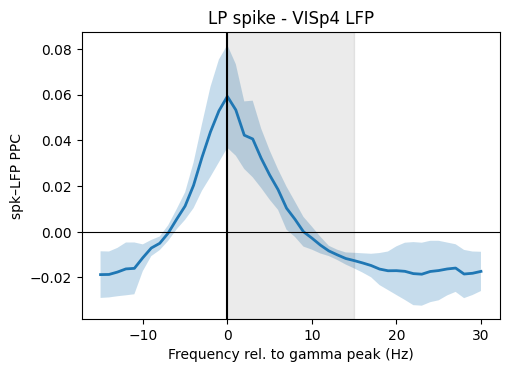

In [ ]:
plt.figure(figsize=(5.2,3.6))
plt.plot(res["df_grid"], res["mean"], lw=2, label=f"{area} mean")
plt.fill_between(res["df_grid"], res["mean"]-res["sem"], res["mean"]+res["sem"], alpha=0.25)
plt.axvline(0, color='k')                             # Δf=0 (개별 유닛 피크 정렬점)
plt.axhline(0, color='k', lw=0.8)
# 필요하면 회색 영역 표시(예: 0~15 Hz)
xmin, xmax = 0, 15
plt.axvspan(xmin, xmax, color='k', alpha=0.08)
plt.xlabel("Frequency rel. to gamma peak (Hz)")       # Δf (Hz)
plt.ylabel("spk–LFP PPC")
plt.tight_layout()
plt.title(f"{area} spike - VISp4 LFP")
plt.show()

In [ ]:
selected_waveform_duration = []
unit_indices = units_by_layer[area]
for i in range(len(units)):
    waveform_duration = units['waveform_duration'][i]
    if i in unit_indices: 
        selected_waveform_duration.append(waveform_duration)
        
print('Number of durations that will be plotted: ', len(selected_waveform_duration))
waveform_du = np.array(selected_waveform_duration)
print(selected_waveform_duration) #ms

Number of durations that will be plotted:  29
[0.7142378559463987, 0.8241206030150754, 0.5494137353433837, 0.4532663316582913, 0.6592964824120603, 0.2472361809045226, 0.8241206030150753, 0.7417085427135678, 0.8515912897822444, 0.6455611390284757, 0.6730318257956448, 0.7554438860971525, 0.3571189279731993, 0.6455611390284756, 0.6180904522613064, 0.233500837520938, 0.7554438860971523, 0.7142378559463985, 0.6455611390284757, 0.6730318257956448, 0.5082077051926298, 0.6455611390284757, 0.4120603015075377, 0.6867671691792294, 0.6730318257956448, 0.2609715242881072, 0.6043551088777218, 0.6318257956448912, 0.5906197654941373]


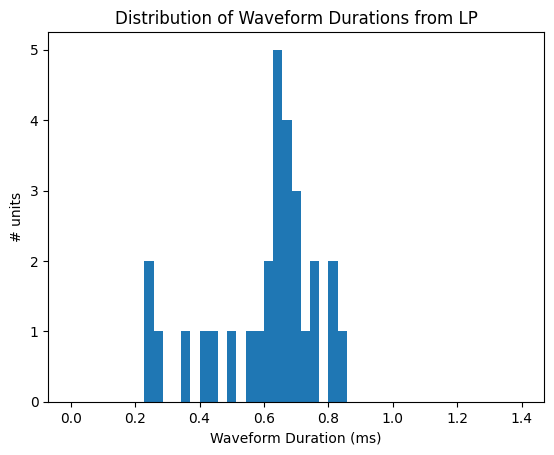

In [ ]:
data = selected_waveform_duration
bins = np.linspace(0, 1.4, 50)

fig, ax = plt.subplots()
ax.hist(data, bins=bins)

plt.xlabel("Waveform Duration (ms)")
plt.ylabel("# units")
plt.title(f"Distribution of Waveform Durations from {area}")
plt.show()

In [ ]:
duration_th = 0.4
selected_peak_waveform_rs = []
selected_peak_waveform_fs = []
channel_id_to_local_index = {}

for i in range(len(stim_nwb.electrodes)):
    channel_id_to_local_index[stim_nwb.electrodes['id'][i]] = stim_nwb.electrodes['local_index'][i]
for index in unit_indices:
    waveform_duration = units['waveform_duration'][index]
    unit_mean_waveform = units['waveform_mean'][index]
    units_channel_id = units['peak_channel_id'][index]
    local_index = channel_id_to_local_index[units_channel_id]
    peak_waveform = unit_mean_waveform[local_index]

    if waveform_duration > duration_th:
        selected_peak_waveform_rs.append(peak_waveform)
    else: 
        selected_peak_waveform_fs.append(peak_waveform)
        
print('number of RS waveforms to be plotted: ', len(selected_peak_waveform_rs))
print('number of FS waveforms to be plotted: ', len(selected_peak_waveform_fs))   

# convert lists into arrays and transpose for the plots
selected_peak_waveform_fs = np.array(selected_peak_waveform_fs).transpose()
selected_peak_waveform_rs = np.array(selected_peak_waveform_rs).transpose()

print(selected_peak_waveform_fs.shape)

number of RS waveforms to be plotted:  25
number of FS waveforms to be plotted:  4
(82, 4)


FS n=4, RS n=25


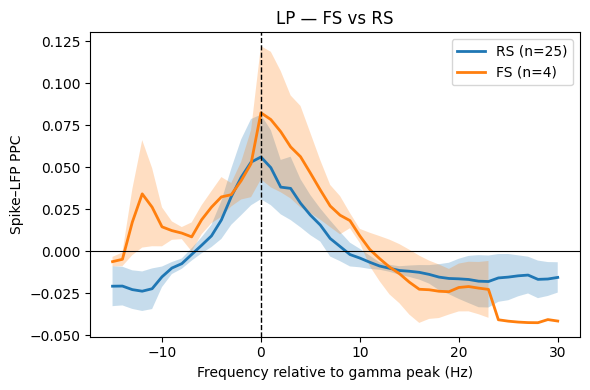

In [ ]:
is_FS = (waveform_du <  duration_th)
is_RS = (waveform_du >=  duration_th)
def _subset(lst, mask):
    idx = np.nonzero(mask)[0]
    return [lst[i] for i in idx], idx

spikes_FS, idx_FS = _subset(spike_al, is_FS)
spikes_RS, idx_RS = _subset(spike_al, is_RS)

print(f"FS n={len(idx_FS)}, RS n={len(idx_RS)}")

# 공통 파라미터 (논문 느낌 값)
twin = (0.10, 0.40)
common_kwargs = dict(
    lfp_rep=lfp_p4, fs=interp_hz,
    fmin=25, fmax=90, df=1,
    df_min=-15, df_max=30, ddf=1,
    n_cycles=6, t_window=twin, min_spikes=5
)

res_FS = layer_deltafreq_ppc_curves(spikes_FS, **common_kwargs) if len(spikes_FS)>0 else None
res_RS = layer_deltafreq_ppc_curves(spikes_RS, **common_kwargs) if len(spikes_RS)>0 else None

# 플롯
plt.figure(figsize=(6,4))
if res_RS is not None:
    plt.plot(res_RS["df_grid"], res_RS["mean"], lw=2, label=f"RS (n={len(idx_RS)})")
    plt.fill_between(res_RS["df_grid"], res_RS["mean"]-res_RS["sem"], res_RS["mean"]+res_RS["sem"], alpha=0.25)
if res_FS is not None:
    plt.plot(res_FS["df_grid"], res_FS["mean"], lw=2, label=f"FS (n={len(idx_FS)})")
    plt.fill_between(res_FS["df_grid"], res_FS["mean"]-res_FS["sem"], res_FS["mean"]+res_FS["sem"], alpha=0.25)

plt.axvline(0, ls='--', lw=1, color='k')   # Δf=0
plt.axhline(0, lw=0.8, color='k')
plt.xlabel("Frequency relative to gamma peak (Hz)")  # Δf (Hz)
plt.ylabel("Spike–LFP PPC")
plt.title(f"{area} — FS vs RS")
plt.legend()
plt.tight_layout()
plt.show()